


# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint

## Learning Objectives



At the end of the experiment, you will be able to :

*  learn how a simple K nearest neighbour classification works. 

## Dataset

### Description

Let us consider a simple situation. Given some data about a fruit, we want to label it automatically.

Fruits are characterized by 
 * weight in grams as a float
 * sphericity  as a float
 * label as a string
     - "A" $\rightarrow$ Apple
     - "O" $\rightarrow$ Orange
     
We are given some sample data such as (303, 3, "A") meaning the fruit with 303 gram weight, and yellow colour is an apple. A set of such *training samples* is given in “kNN_weight_sphericity_train.csv”. 

We are given a set of **test** data where only weight and colour are given,  eg. (373,1). We should design a simple Nearest Neighbour classifier that will find the fruit label. i.e., "A" or "O", meaning Apple or Orange. 

We have several such testcases, split into train and test. We try to see if our predictions are fine on test data.


## AIML Technique

In this experiment we will be using knn classifier to predict the labels of test data.

### K-nearest neighbor (KNN)

K-nearest neighbor is a supervisied learning algorithm where the result of new instance sample is classified based on the majority k-nearest neighbors. 

For example, given a new sample , we find k number of training sample close to the new sample by calculating the distance between them. The classification is done using majority vote among k nearest samples.

### Setup Steps:

In [0]:
#@title Please enter your registration id to start: (e.g. P181900101) { run: "auto", display-mode: "form" }
Id = "P181902118" #@param {type:"string"}


In [0]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "8860303743" #@param {type:"string"}


In [0]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook="BLR_M0W1_KNN_weight_sphericity" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/kNN_weight_sphericity_train.csv")
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/kNN_weight_sphericity_test.csv")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      print("Your submission is successful.")
      print("Ref Id:", submission_id)
      print("Date of submission: ", r["date"])
      print("Time of submission: ", r["time"])
      print("View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions")
      print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
      return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if Additional: return Additional      
    else: raise NameError('')
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None

def getAnswer():
  try:
    return Answer
  except NameError:
    print ("Please answer Question")
    return None

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
    from IPython.display import HTML
    HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id))
  
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [0]:
## Let us set up the file names
FRUITS_TRAIN = "kNN_weight_sphericity_train.csv"
FRUITS_TEST1 = "kNN_weight_sphericity_test.csv"

In [0]:
# Let us first read the data from the file and do a quick visualization
import pandas as pd
train = pd.read_csv(FRUITS_TRAIN)
test = pd.read_csv(FRUITS_TEST1)
print(train.shape, test.shape)

(39, 3) (19, 3)


In [0]:
#Let us see first five rows of data
print(train.head(), end = "\n\n")
print(test.head())

   Weight  Sphericity Label
0     200        0.40     A
1     320        1.00     O
2     310        0.95     O
3     220        0.45     A
4     230        0.50     A

   Weight  Sphericity Label
0     350        0.40     O
1     346        1.00     O
2     348        0.95     O
3     210        0.30     A
4     225        0.25     A


We see that similar fruits come close in the feature (weight, color) space. Now let us plot one sample data given in black.

In [0]:
import matplotlib.pyplot as plt

In [0]:
apples=train[train['Label']=='A']
oranges=train[train['Label']=='O']

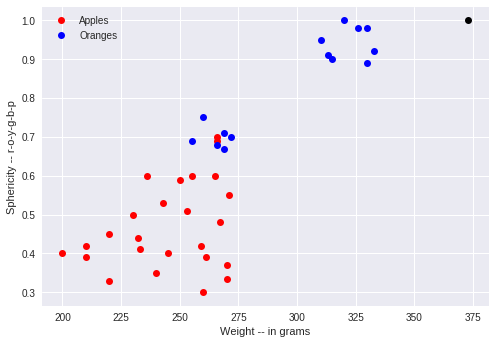

In [0]:
plt.plot(apples.Weight, apples.Sphericity, "ro")
plt.plot(oranges.Weight, oranges.Sphericity, "bo")
plt.xlabel("Weight -- in grams")
plt.ylabel("Sphericity -- r-o-y-g-b-p")
plt.legend(["Apples", "Oranges"])
plt.plot([373], [1], "ko")
plt.show()

From the visualization alone, we can infer that the unknown fruit is likely to be an Orange. 

The job now is to instead of eyeballing it one at a time like above, use a kNN classifier with, say, $k = 3$ and using the *Euclidean* distance, to determine the correct label for the data in the file  "kNN_weight_sphericity_test.csv"


Now let us write code to find the $k$ nearest neighbours of a given fruit

In [0]:
train = train.values
test = test.values



In [0]:
# Let us store the data and labels in two separte variables
# Storing the train data
train_data = train[:,:2]
# Storing the train labels
train_labels = train[:,2]

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
def knn(k,train_data,train_labels,test):
  knn_c = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn_c.fit(train_data,train_labels) 
  return knn_c.predict(test)

Now let us use the test data and find the labels for all of them. Also let us calculate the accuracy

In [0]:
## When k = 3
# Storing test data
test_data = test[:,:2]
#storing test labels
test_labels = test[:,2]
# Calling the knn function to predict the labels for test data
predicted_values = knn(3,train_data,train_labels,test_data)

In [0]:
predicted_values

array(['O', 'O', 'O', 'A', 'A', 'A', 'A', 'A', 'A', 'O', 'O', 'O', 'A',
       'A', 'A', 'O', 'O', 'O', 'O'], dtype=object)

### let us calculate the accuracy

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, predicted_values)

0.9473684210526315

Text(0.5, 1.0, 'Linear Classfier')

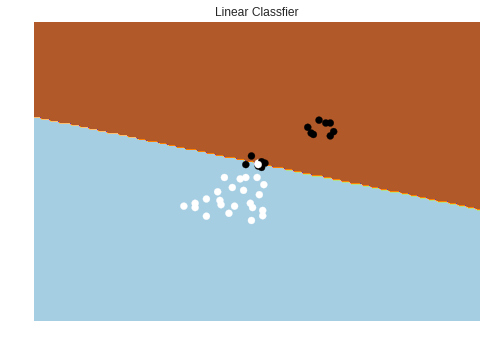

In [0]:
#@title Linear classifiers learn a separating hyperplane from the training samples. Run the cell to create a Linear Classifier. Plot the outputs using matplotlib. Double clicking here would reveal the code causing the classifier.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import numpy as np
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
train = pd.read_csv(FRUITS_TRAIN)
test = pd.read_csv(FRUITS_TEST1)
X2 = train.iloc[:,:-1].values#np.array([[2,1],[3,4],[4,2],[3,1]])
X=scaler.fit_transform(X2)


Y = le.fit_transform(train.iloc[:,-1].values)
h = .02  # step size in the mesh

#clf2 = Perceptron(max_iter=1000).fit(X, Y)
clf2 = linear_model.SGDClassifier(max_iter=1000, tol=1e-3)

clf2.fit(X,Y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
fig, ax = plt.subplots()
Z = clf2.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
ax.axis('off')

# Plot also the training points
ax.scatter(X[:, 0], X[:, 1], c=Y)

ax.set_title('Linear Classfier')

**Exercise 1** :: Repeat the above experiment with different values of k. Please note that the dataset here is small and used for represenatational/visualization purpose. Hence varying k might not impact the output by a lot.

In [0]:
## Your code here
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


FRUITS_TRAIN = "kNN_weight_sphericity_train.csv"
FRUITS_TEST1 = "kNN_weight_sphericity_test.csv"
train = pd.read_csv(FRUITS_TRAIN)
test = pd.read_csv(FRUITS_TEST1)
train = train.values
test = test.values
print("train.shape: ", train.shape," test.shape: ",  test.shape)
train_data = train[:,:2]
train_labels = train[:,2]

test_data = test[:,:2]
test_labels = test[:,2]

def knn(k,train_data,train_labels,test):
  knn_c = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn_c.fit(train_data,train_labels) 
  return knn_c.predict(test)

kList = [3, 4, 5, int(math.sqrt(train.shape[0])), 10, 15, 20, 25, 30]
for eachK in kList:  
  predicted_values = knn(eachK,train_data,train_labels,test_data)
  print("For K=", eachK, " accuracy=", accuracy_score(test_labels, predicted_values))

train.shape:  (39, 3)  test.shape:  (19, 3)
For K= 3  accuracy= 0.9473684210526315
For K= 4  accuracy= 0.9473684210526315
For K= 5  accuracy= 0.9473684210526315
For K= 6  accuracy= 0.9473684210526315
For K= 10  accuracy= 0.9473684210526315
For K= 15  accuracy= 0.9473684210526315
For K= 20  accuracy= 0.9473684210526315
For K= 25  accuracy= 0.9473684210526315
For K= 30  accuracy= 0.42105263157894735


**Exercise 2** ::  Ignore the sphericity feature from train and test data then calculate the accuracy on the test data.

In [0]:
## Your code here
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


FRUITS_TRAIN = "kNN_weight_sphericity_train.csv"
FRUITS_TEST1 = "kNN_weight_sphericity_test.csv"
train = pd.read_csv(FRUITS_TRAIN)
test = pd.read_csv(FRUITS_TEST1)
train = train.values
test = test.values
train_data = train[:,:1]
train_labels = train[:,2]

test_data = test[:,:1]
test_labels = test[:,2]

print("train_data.shape: ", train_data.shape," test_data.shape: ",  test_data.shape)

def knn(k,train_data,train_labels,test):
  knn_c = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
  knn_c.fit(train_data,train_labels) 
  return knn_c.predict(test)

kList = [3, 4, 5, int(math.sqrt(train.shape[0])), 10, 15, 20, 25, 30]
for eachK in kList:  
  predicted_values = knn(eachK,train_data,train_labels,test_data)
  print("For K=", eachK, " accuracy=", accuracy_score(test_labels, predicted_values))

train_data.shape:  (39, 1)  test_data.shape:  (19, 1)
For K= 3  accuracy= 0.9473684210526315
For K= 4  accuracy= 0.9473684210526315
For K= 5  accuracy= 0.9473684210526315
For K= 6  accuracy= 0.9473684210526315
For K= 10  accuracy= 0.9473684210526315
For K= 15  accuracy= 0.9473684210526315
For K= 20  accuracy= 0.9473684210526315
For K= 25  accuracy= 0.9473684210526315
For K= 30  accuracy= 0.42105263157894735



**Exercise 3** :: If we use the sum of the absolute differences, as the distance metric instead of the Euclidean, how does that affect the accuracy?

In [0]:
## Your code here
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


FRUITS_TRAIN = "kNN_weight_sphericity_train.csv"
FRUITS_TEST1 = "kNN_weight_sphericity_test.csv"
train = pd.read_csv(FRUITS_TRAIN)
test = pd.read_csv(FRUITS_TEST1)
train = train.values
test = test.values
print("train.shape: ", train.shape," test.shape: ",  test.shape)
train_data = train[:,:2]
train_labels = train[:,2]

test_data = test[:,:2]
test_labels = test[:,2]

def knn(k,train_data,train_labels,test):
  knn_c = KNeighborsClassifier(n_neighbors=k,metric='manhattan')
  knn_c.fit(train_data,train_labels) 
  return knn_c.predict(test)

kList = [3, 4, 5, int(math.sqrt(train.shape[0])), 10, 15, 20, 25, 30]
for eachK in kList:  
  predicted_values = knn(eachK,train_data,train_labels,test_data)
  print("For K=", eachK, " accuracy=", accuracy_score(test_labels, predicted_values))

train.shape:  (39, 3)  test.shape:  (19, 3)
For K= 3  accuracy= 0.9473684210526315
For K= 4  accuracy= 0.9473684210526315
For K= 5  accuracy= 0.9473684210526315
For K= 6  accuracy= 0.9473684210526315
For K= 10  accuracy= 0.9473684210526315
For K= 15  accuracy= 0.9473684210526315
For K= 20  accuracy= 0.9473684210526315
For K= 25  accuracy= 0.9473684210526315
For K= 30  accuracy= 0.42105263157894735


## Summary
In the above experiment, we find that 
 * a simple nearest neighbour method can successfully predict labels with a small number of labelled examples. We also demo a Linear Classifier that separates the two classes, for the same data.
 * But we also see that the results can go really wrong 
    - if we make some wrong choices (like weight in Kg, or a very large K).

This should remind you about the practical expertise and experimental skills that will become equally important as we move forward.

### Please answer the questions below to complete the experiment:

In [0]:
#@title When does we use nearest neighbor approach ? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "with large-sized datasets" #@param ["with large-sized datasets","when irrelevant attributes have been removed from the data" ]

In [0]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [0]:
#@title If it was very easy, what more you would have liked to have been added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "good" #@param {type:"string"}

In [0]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["Yes", "No"]

In [0]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id =return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 1693
Date of submission:  15 Mar 2019
Time of submission:  18:38:25
View your submissions: https://iiith-aiml.talentsprint.com/notebook_submissions
For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.
